# UDEMY PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [2]:
df = pd.read_csv('udemy_courses-raw.csv')

In [3]:
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance


In [4]:
df.sample(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1016,614668,8 Steps To Achieve Financial Freedom And Escap...,https://www.udemy.com/achieve-financial-freedo...,True,40,5,0,48,Beginner Level,5.5,2015-11-13T17:43:47Z,Business Finance
821,721746,Forex Trading Plan,https://www.udemy.com/forex-trading-plan/,True,50,21,3,24,All Levels,0.7,2016-02-13T05:53:11Z,Business Finance


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [6]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


## Data Processing

Categorical_Data

In [7]:
df['subject'].value_counts()

subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

In [8]:
df['level'].value_counts()

level
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [9]:
df['is_paid'].value_counts()

is_paid
True     3368
False     310
Name: count, dtype: int64

Parsing timestamp

In [10]:
df['published_timestamp']

0       2017-01-18T20:58:58Z
1       2017-03-09T16:34:20Z
2       2016-12-19T19:26:30Z
3       2017-05-30T20:07:24Z
4       2016-12-13T14:57:18Z
                ...         
3673    2016-06-14T17:36:46Z
3674    2017-03-10T22:24:30Z
3675    2015-12-30T16:41:42Z
3676    2016-08-11T19:06:15Z
3677    2014-09-28T19:51:11Z
Name: published_timestamp, Length: 3678, dtype: object

Method helps to convert string Date time into Python Date time object.

In [11]:
pd.to_datetime(df['published_timestamp'])

0      2017-01-18 20:58:58+00:00
1      2017-03-09 16:34:20+00:00
2      2016-12-19 19:26:30+00:00
3      2017-05-30 20:07:24+00:00
4      2016-12-13 14:57:18+00:00
                  ...           
3673   2016-06-14 17:36:46+00:00
3674   2017-03-10 22:24:30+00:00
3675   2015-12-30 16:41:42+00:00
3676   2016-08-11 19:06:15+00:00
3677   2014-09-28 19:51:11+00:00
Name: published_timestamp, Length: 3678, dtype: datetime64[ns, UTC]

In [12]:
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

to save the new parsed value

In [13]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [14]:
df.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

Creating 3 new time columns for future use..

In [15]:
df['Year'] = df['published_timestamp'].dt.year

In [16]:
df['Month'] = df['published_timestamp'].dt.month_name()

In [17]:
df['Day'] = df['published_timestamp'].dt.day_name()

In [18]:
df['Quarter'] = df['published_timestamp'].dt.quarter

To view the added columns...

In [19]:
df.sample()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year,Month,Day,Quarter
2650,763774,JavaScript Game Development: Create Your Own B...,https://www.udemy.com/javascript-game-developm...,False,0,10179,314,21,All Levels,1.5,2016-09-26 23:44:51+00:00,Web Development,2016,September,Monday,3


We will be setting the Index with respect to timestamp for better DATA_VISUALIZATION


In [20]:
df.set_index(df['published_timestamp'], inplace = True)

In [21]:
df.sample()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year,Month,Day,Quarter
published_timestamp,,,,,,,,,,,,,,,,
2013-11-11 00:28:17+00:00,101864,Programming for Entrepreneurs - JavaScript,https://www.udemy.com/javascript-tutorial/,True,200,12873,106,38,Beginner Level,2.5,2013-11-11 00:28:17+00:00,Web Development,2013,November,Monday,4


We will add a new column 'Profit'

In [22]:
df['Profit'] = df['price'] * df['num_subscribers']

In [23]:
df.sample()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year,Month,Day,Quarter,Profit
published_timestamp,,,,,,,,,,,,,,,,,
2017-01-26 22:55:27+00:00,1085580,"RSI, Options Trading & Technical Analysis (3 C...",https://www.udemy.com/charting-rsi-options-sto...,True,200,1047,9,46,All Levels,3.5,2017-01-26 22:55:27+00:00,Business Finance,2017,January,Thursday,1,209400


Checking for the Duplicated values in the UNIQUE Course ID 

In [24]:
df['course_id'].nunique()

3672

By comparing 3672 and the total values found in the data_set (3678) we will find 6 Duplicated Course_id,
So the next step is detecting the duplicated values

In [25]:
df[df.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year,Month,Day,Quarter,Profit
published_timestamp,,,,,,,,,,,,,,,,,
2016-05-16 18:28:30+00:00,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance,2016,May,Monday,2,0
2017-04-23 16:19:01+00:00,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance,2017,April,Sunday,2,0
2016-12-15 14:56:17+00:00,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance,2016,December,Thursday,4,0
2017-07-02 14:29:35+00:00,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance,2017,July,Sunday,3,0
2014-04-15 21:48:55+00:00,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design,2014,April,Tuesday,2,0
2013-01-03 00:55:31+00:00,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development,2013,January,Thursday,1,3246375


To drop the duplicated values 

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.duplicated().sum()

0

Categorization for numerical data, Since the content 'Duration' is in numeric values we can categorize it for future benfits in the project Dashboard.

In [28]:
df['content_duration'].value_counts()

content_duration
1.000000     606
1.500000     506
2.000000     419
2.500000     269
3.000000     248
            ... 
0.483333       1
78.500000      1
70.000000      1
0.000000       1
66.500000      1
Name: count, Length: 105, dtype: int64

In [29]:
df['Duration'] = pd.qcut(df['content_duration'], 6, labels = ['0:1', '1:3','3:7','7:12', '12:20', '20+'])

In [30]:
df.sample()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year,Month,Day,Quarter,Profit,Duration
published_timestamp,,,,,,,,,,,,,,,,,,
2013-07-09 03:16:26+00:00,64422,1 Hour HTML,https://www.udemy.com/1-hour-html/,True,200,16212,514,20,Beginner Level,1.0,2013-07-09 03:16:26+00:00,Web Development,2013,July,Tuesday,3,3242400,0:1


In [31]:
df.rename(columns = {'Duration':'Duration_category'}, inplace = True)

In [32]:
df.sample()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year,Month,Day,Quarter,Profit,Duration_category
published_timestamp,,,,,,,,,,,,,,,,,,
2014-03-12 13:40:53+00:00,180362,The Securities Trade Lifecycle,https://www.udemy.com/the-securities-trade-lif...,True,50,1182,110,22,All Levels,4.0,2014-03-12 13:40:53+00:00,Business Finance,2014,March,Wednesday,1,59100,12:20


In [33]:
df['Duration_category'].value_counts()

Duration_category
0:1      931
7:12     699
20+      590
12:20    527
1:3      506
3:7      419
Name: count, dtype: int64

Categorization for numerical data, Since the 'price' is in numeric values we can categorize it for future benfits in the project Dashboard.

In [34]:
df['price'].value_counts()

price
20     827
50     468
0      310
200    295
40     216
30     166
25     153
95     152
100    133
195    127
35     116
150     88
45      83
75      80
60      75
120     37
55      35
85      31
125     30
65      30
80      29
145     27
70      26
90      19
180     17
115     16
175     13
105     11
190     10
140     10
110      8
135      8
165      6
185      6
170      5
160      4
130      3
155      2
Name: count, dtype: int64

In [35]:
price_dict = {
    0: "Free",
    range (20, 55, 5):'20:50',
    range (55, 105, 5): '55:100',
    range (105, 155, 5): '105:150',
    range (155, 205, 5): '155:200'
}

In [36]:
df['Price_Category'] = df['price'].replace(price_dict)

In [37]:
df.sample()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year,Month,Day,Quarter,Profit,Duration_category,Price_Category
published_timestamp,,,,,,,,,,,,,,,,,,,
2015-03-26 18:20:18+00:00,410196,DIY: Reduce Unpaid Federal Tax thru IRS Offer...,https://www.udemy.com/diy-reduce-unpaid-federa...,True,20,44,3,8,All Levels,1.0,2015-03-26 18:20:18+00:00,Business Finance,2015,March,Thursday,1,880,0:1,20:50


## Eploratory Data Analysis (EDA)

- Univariate Analysis
- BI-Variate Analysis
- Multi-Variate Analysis

## EDA for feature "Subject"

### 1) Uni-variate Analysis

In [38]:
df['subject']

published_timestamp
2017-01-18 20:58:58+00:00    Business Finance
2017-03-09 16:34:20+00:00    Business Finance
2016-12-19 19:26:30+00:00    Business Finance
2017-05-30 20:07:24+00:00    Business Finance
2016-12-13 14:57:18+00:00    Business Finance
                                   ...       
2016-06-14 17:36:46+00:00     Web Development
2017-03-10 22:24:30+00:00     Web Development
2015-12-30 16:41:42+00:00     Web Development
2016-08-11 19:06:15+00:00     Web Development
2014-09-28 19:51:11+00:00     Web Development
Name: subject, Length: 3672, dtype: object

#### A. Feature overview

In [39]:
df['subject'].describe()

count                3672
unique                  4
top       Web Development
freq                 1199
Name: subject, dtype: object

In [40]:
df['subject'].count()

3672

In [41]:
df['subject'].nunique()

4

#### B. How many courses in each subject? 

In [42]:
df['subject'].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

<Axes: xlabel='subject'>

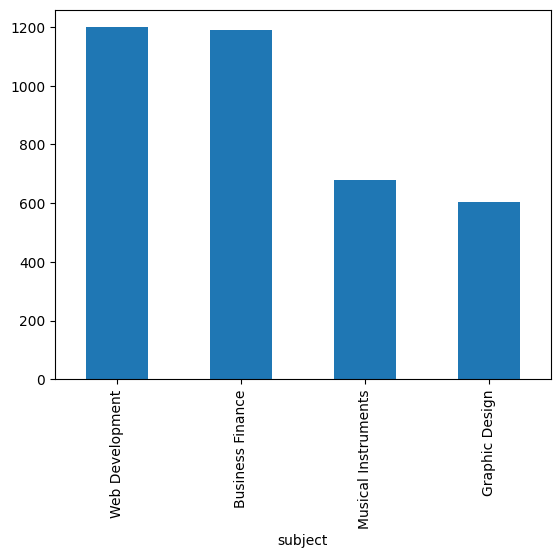

In [43]:
df['subject'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

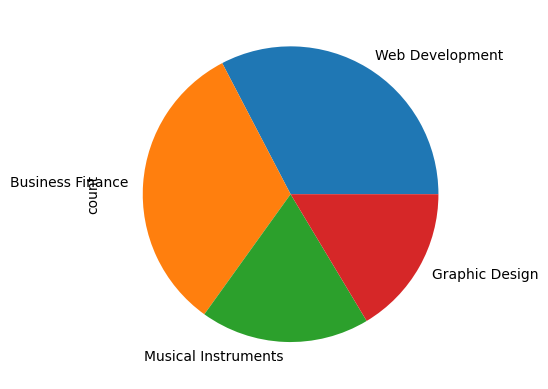

In [44]:
df['subject'].value_counts().plot(kind='pie')

### 2) Bi-Variate Analysis

#### A. How Many subscribers in each subject?

In [45]:
df.groupby('subject').sum()['num_subscribers']

TypeError: datetime64 type does not support sum operations

In [ ]:
pip install nbformat==5.1.2

##### VISUALIZATION Using Plotly

In [ ]:
fig = px.bar(data_frame = df,
       x = df.groupby('subject').sum()['num_subscribers'].index,
       y = df.groupby('subject').sum()['num_subscribers'].values)
fig.update_xaxes(title = 'Subject')
fig.update_yaxes(title = '# Subscribers')
fig.show()

#### B. Profit per each subject?

In [ ]:
dict(df.groupby('subject').sum()['Profit'])
                                

##### VISUALIZATION using Seaborn.

In [ ]:
plt.figure(figsize =(15,8))
plt.xticks(rotation = 45)
sns.barplot(data = df,
           x = df.groupby('subject').sum()['Profit'].index,
           y = df.groupby('subject').sum()['Profit'].values,
           palette = 'plasma')


#### B. How many paid an non-paid in each subject? 

In [ ]:
df.groupby('subject').sum()['is_paid']

In [ ]:
#unpaid courses
df[df['is_paid'] == False]['subject'].value_counts().plot(kind = 'bar')

In [ ]:
#Paid courses
df[df['is_paid'] == True]['subject'].value_counts().plot(kind = 'bar')

### 3) Multi-variate Analysis (subject)

#### A. How many courses in each subject according to is_paid?

#### using Plotly

In [ ]:
fig = px.bar(data_frame = df,
       x = df['subject'],
     color = df['is_paid'])
fig.update_xaxes(title = 'Subject')
fig.update_yaxes(title = '# Courses')
fig.show()

#### B. How many courses in each subject according to Price_category?

#### using Seaborn

In [ ]:
plt.figure(figsize = (18,5))
plt.xticks(rotation = 45)
sns.countplot(data = df, x = df['subject'], hue = df['Price_Category'])

#### C. How many courses in each subject according to Price_category?

#### using Seaborn

In [ ]:
plt.figure(figsize = (18,5))
plt.xticks(rotation = 45)
sns.countplot(data = df, x = df['subject'], hue = df['Duration_category'])

#### D. How many courses in each subject according to level?

#### using Seaborn

In [ ]:
plt.figure(figsize = (18,5))
plt.xticks(rotation = 45)
sns.countplot(data = df, x = df['subject'], hue = df['level'])

#### E. In each year what is the total profit made by each subject?

In [ ]:
df.groupby(['Year','subject'],as_index=False)['Profit'].sum()

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='subject',y='Profit',hue='Year')

In [ ]:
px.pie(data_frame=df, names='subject', values='Profit', color='Year')

##### F. Regarding price category, what is the total profit made by each subject?

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='subject',y='Profit',hue='Price_Category')

##### G. Regarding duration category, what is the total profit made by each subject?

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='subject',y='Profit',hue='Duration_category')

##### H. Regarding level, what is the total profit made by each subject?

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='subject',y='Profit',hue='level')

##### I. Regarding each year, how many subscribers in each subject?

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='subject',y='num_subscribers',hue='Year')

##### J. Regarding price category, how many subscribers in each subject?

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='subject',y='num_subscribers',hue='Price_Category')

##### K. Regarding duration category, how many subscribers in each subject?

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='subject',y='num_subscribers',hue='Duration_category')

##### L. Regarding level, how many subscribers in each subject?

In [ ]:

plt.figure(figsize=(15,8))
sns.barplot(data=df,x='subject',y='num_subscribers',hue='level')

In [ ]:
df['Profit'].describe()

## Time Series Analysis

### published_timestamp

In [ ]:
df.sample(2)

In [ ]:
df.index

In [ ]:
df.loc['2017'].head(2)

In [ ]:
df.index.year

In [ ]:
df.loc['2017-1-24' : '2017-1-25']

### Profit

##### What is the total profit in each year?

In [ ]:
df.resample("Y").sum()['Profit']

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.barplot(x=df.resample("Y").sum()['Profit'].index.year,
           y=df.resample("Y").sum()['Profit'].values)

In [ ]:
df.index.month_name()

In [ ]:
df.index.year

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.lineplot(x = df.loc['2013'].resample("MS").sum()['Profit'].index.month_name(),
            y = df.loc['2013'].resample("MS").sum()['Profit'].values)

In [ ]:
df.to_csv('Udemy-courses-cleaned.csv')

In [ ]:
!pip install pandas-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
from ydata_profiling import ProfileReport


In [ ]:
pandas version


In [ ]:
from platform import python_version

print(python_version())